# Training classifiers!

### This notebook was built to train a few classifiers to identify whether or not we can predict calculated value from one season to the next. Initially, we will train a random forest classifier on a 70/30 train/test split from the 2012-2013 season. The other classifiers used will be as follows:

* Random forest, trained on 2012-2013, predicting on 2013-2014
* Linear Regression on a 70/30 train/test split from the 2012-2013 season.
* Linear Regression trained on 2012-2013, predicting on 2013-2014

In [1]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import all ML modules and packages we'll need
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



In [2]:
features12 = pd.read_pickle('../Data/features12-13.pkl').transpose()
features13 = pd.read_pickle('../Data/features13-14.pkl').transpose()

In [3]:
features12.head()

,avg_value,avg_value_smoothed,cum_value_list,match_value_list,max_scoring_streak,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,nhome_assists,nhome_goals,nlate_assists,nlate_goals,nmid_assists,nmid_goals,nsub_assists,nsub_goals,ntiebreaker_assists,ntiebreaker_goals,season_value,smoothed_value_list
Aaron Hunt,1.142434,1.19568,"[0, 3.75, 4.9, 4.9, 8.35, 8.35, 8.35, 9.1, 9.1...","[0, 3.75, 1.15, 0, 3.45, 0, 0, 0.75, 0, 8.0, 3...",3,4,0,5,0,3,0,2,11,4,6,1,1,3,7,0,2,1,8,43.4125,"[0.0, 1.875, 1.63333333333, 1.225, 1.67, 1.67,..."
Aaron Lennon,0.6901316,0.5942928,"[0, 0, 0, 3.1625, 3.1625, 3.1625, 4.1625, 6.91...","[0, 0, 0, 3.1625, 0, 0, 1.0, 2.75, 0, 0, 0, 0,...",3,7,2,1,1,1,1,0,4,5,3,2,0,4,3,0,0,4,2,26.225,"[0.0, 0.0, 0.0, 0.790625, 0.6325, 0.6325, 0.83..."
Aaron Ramsey,0.1848684,0.1690789,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1625...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.1625...",1,2,2,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,7.025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Abdelaziz Barrada,0.7023026,0.7875164,"[0, 5.5, 8.6625, 8.6625, 11.825, 14.575, 14.57...","[0, 5.5, 3.1625, 0, 3.1625, 2.75, 0, 0, 0, 0, ...",2,6,1,2,1,0,1,2,4,5,2,2,0,3,4,0,0,3,2,26.6875,"[0.0, 2.75, 2.8875, 2.165625, 2.365, 2.915, 1...."
Abdou TraorÃ©,0.01973684,0.003947368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0.75,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
features12.columns

Index([u'avg_value', u'avg_value_smoothed', u'cum_value_list', u'match_value_list', u'max_scoring_streak', u'nassists', u'naway_assists', u'naway_goals', u'nearly_assists', u'nearly_goals', u'nequalizer_assists', u'nequalizer_goals', u'ngoals', u'nhome_assists', u'nhome_goals', u'nlate_assists', u'nlate_goals', u'nmid_assists', u'nmid_goals', u'nsub_assists', u'nsub_goals', u'ntiebreaker_assists', u'ntiebreaker_goals', u'season_value', u'smoothed_value_list'], dtype='object')

### Pull out the features that we will predict on

In [5]:
features_to_predict = ['avg_value','avg_value_smoothed','nassists','naway_assists','naway_goals','nearly_assists','nearly_goals',
                       'nequalizer_assists','nequalizer_goals','ngoals','nhome_assists','nhome_goals','nlate_assists','nlate_goals',
                       'nmid_assists','nmid_goals','nsub_assists','nsub_goals','ntiebreaker_assists','ntiebreaker_goals','max_scoring_streak']

In [6]:
featDF12 = features12[features_to_predict]
featDF13 = features13[features_to_predict]
target12 = features12['season_value']
target13 = features13['season_value']

In [7]:
featDF12.head()

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,nhome_assists,nhome_goals,nlate_assists,nlate_goals,nmid_assists,nmid_goals,nsub_assists,nsub_goals,ntiebreaker_assists,ntiebreaker_goals,max_scoring_streak
Aaron Hunt,1.142434,1.19568,4,0,5,0,3,0,2,11,4,6,1,1,3,7,0,2,1,8,3
Aaron Lennon,0.6901316,0.5942928,7,2,1,1,1,1,0,4,5,3,2,0,4,3,0,0,4,2,3
Aaron Ramsey,0.1848684,0.1690789,2,2,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1
Abdelaziz Barrada,0.7023026,0.7875164,6,1,2,1,0,1,2,4,5,2,2,0,3,4,0,0,3,2,2
Abdou TraorÃ©,0.01973684,0.003947368,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


### Create test-train-split on 2012-13 data

In [8]:
np.mean(target12), np.mean(target13)

(12.550972263980771, 12.377898903775909)

We see that the two seasons have similar means in player value

In [9]:
itrain, itest = train_test_split(xrange(featDF12.shape[0]), train_size=0.7)
mask=np.ones(featDF12.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [10]:
np.mean(target12[mask]), np.mean(target12[~mask])

(12.190700708762899, 13.391365230460913)

By splitting the data into training and test subsets, we don't significantly alter the target means. Pretty good, let's continue!

In [11]:
Xtrain12_1, Xtest12_1 = featDF12[mask], featDF12[~mask]
Ytrain12_1, Ytest12_1 = target12[mask], target12[~mask]

In [12]:
forest = RandomForestRegressor(n_estimators=50).fit(Xtrain12_1,Ytrain12_1)

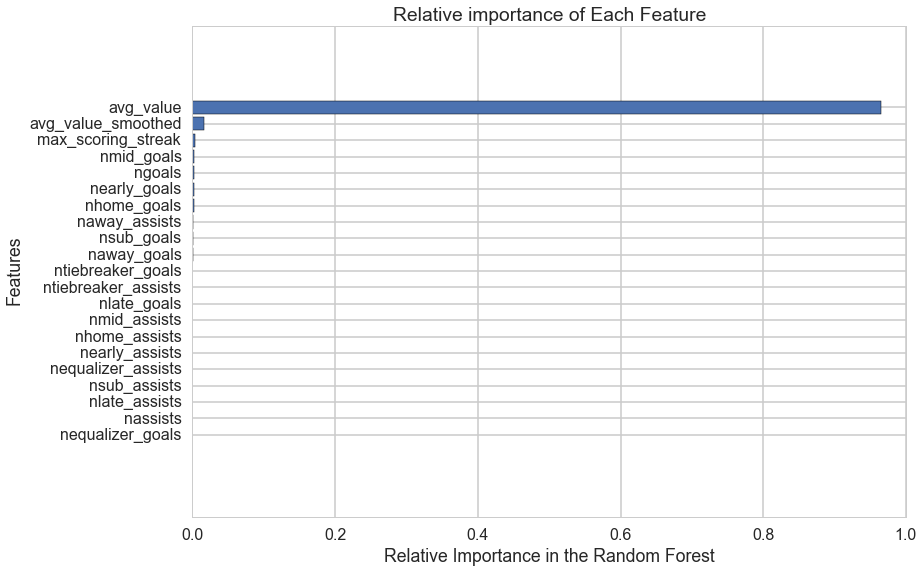

In [16]:
importance_list = forest.feature_importances_
name_list = featDF12.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.savefig('../Plots/feature-importance.jpg',bbox_inches='tight')
plt.show()


### Here we see that  the importance of the 'avg_value' and 'avg_value_smoothed' features far outweigh the others. After seeing this, we'll remove the two of them and only use the incremented totals for goals and assists.

In [17]:
features_to_predict = ['nassists','naway_assists','naway_goals','nearly_assists','nearly_goals', 'max_scoring_streak',
                       'nequalizer_assists','nequalizer_goals','ngoals','nhome_assists','nhome_goals','nlate_assists','nlate_goals',
                       'nmid_assists','nmid_goals','nsub_assists','nsub_goals','ntiebreaker_assists','ntiebreaker_goals']

In [18]:
featDF12 = features12[features_to_predict]
featDF13 = features13[features_to_predict]
target12 = features12['season_value']
target13 = features13['season_value']

In [19]:
itrain, itest = train_test_split(xrange(featDF12.shape[0]), train_size=0.7)
mask=np.ones(featDF12.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [20]:
Xtrain12_1, Xtest12_1 = featDF12[mask], featDF12[~mask]
Ytrain12_1, Ytest12_1 = target12[mask], target12[~mask]

In [21]:
forest = RandomForestRegressor(n_estimators=50).fit(Xtrain12_1,Ytrain12_1)

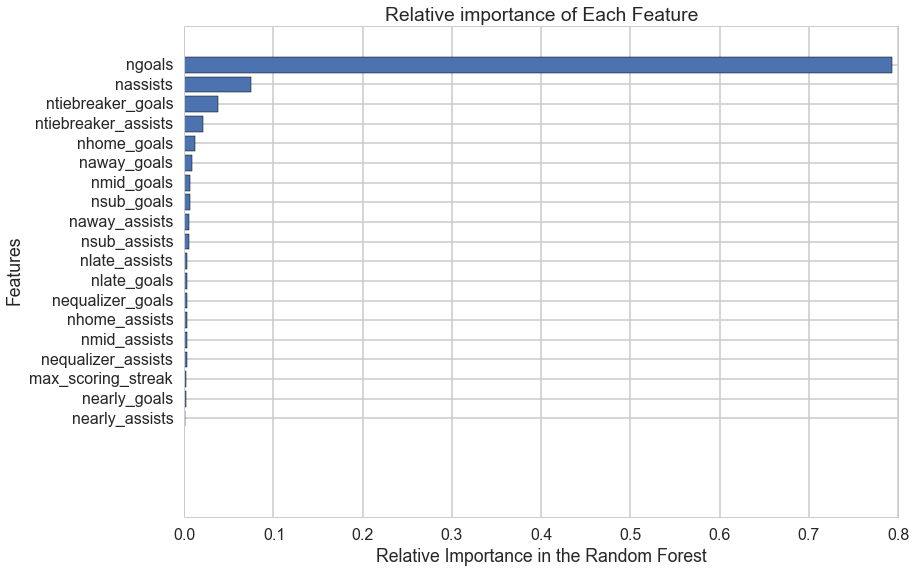

In [23]:
importance_list = forest.feature_importances_
name_list = featDF12.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.savefig('../Plots/feature-importance-corrected.jpg',bbox_inches='tight')
plt.show()

### Even though the 'ngoals' feature far outweighs all others, we still see that each feature happens to contribute somewhat to the regression. We'll keep this classifier as is.

In [24]:
print "The accuracy of our regressor on the training set is: ", forest.score(Xtrain12_1, Ytrain12_1)
print "The accuracy of our regressor on the test set is: ", forest.score(Xtest12_1, Ytest12_1)

The accuracy of our regressor on the training set is:  0.99308597975
The accuracy of our regressor on the test set is:  0.961215225307


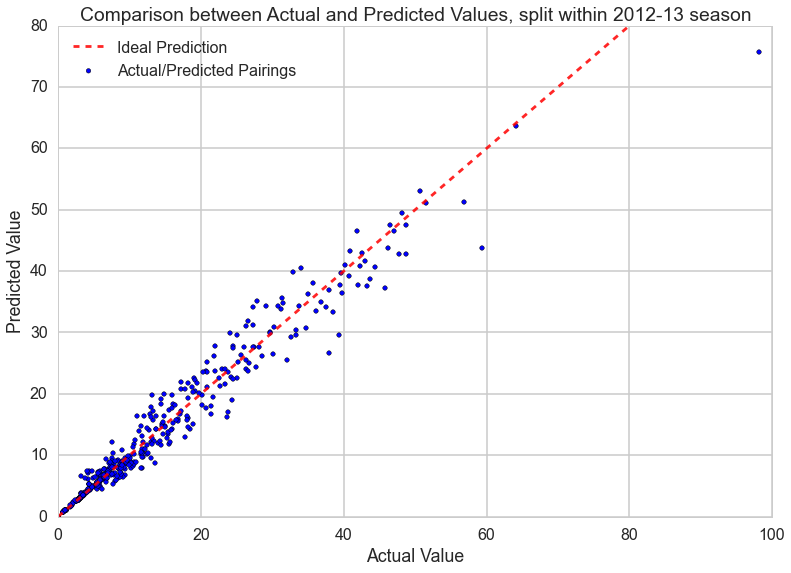

In [27]:
# Plot scatter of predictions vs. actual, split within 2012-13
Ypred12_1 = forest.predict(Xtest12_1)
plt.figure()
plt.plot(range(81),range(81),'r--',alpha=0.85,label="Ideal Prediction")
plt.scatter(Ytest12_1,Ypred12_1,label="Actual/Predicted Pairings")
plt.xlim([0, 100])
plt.ylim([0, 80])
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison between Actual and Predicted Values, split within 2012-13 season")
plt.legend(loc=0)
plt.savefig('../Plots/actual-vs-predicted-2012-13.jpg',bbox_inches='tight')
plt.show()


#### Predicting top 20 players from our 2012-13 test set using the random forest

In [28]:
testNames_rf12 = Xtest12_1.index.values
pred_idx_rf12 = np.argsort(Ypred12_1)[-20:][::-1]
act_idx_rf12 = np.argsort(Ytest12_1)[-20:][::-1]

In [29]:
top20_pred_rf12 = zip(testNames_rf12[pred_idx_rf12],Ypred12_1[pred_idx_rf12])
top20_actual_rf12 = zip(testNames_rf12[act_idx_rf12],Ytest12_1[act_idx_rf12])

In [30]:
# Not sure how to plot this...
[(top20_actual_rf12[i][0], top20_pred_rf12[i][0]) for i in range(20)]

[(u'Robin van Persie', u'Robin van Persie'),
 (u'Gareth Bale', u'Gareth Bale'),
 (u'Edin D\xc5\xbeeko', u'Dimitar Berbatov'),
 (u'Germ\xc3\xa1n Denis', u'Germ\xc3\xa1n Denis'),
 (u'Aduriz', u'Aduriz'),
 (u'Dimitar Berbatov', u'Max Kruse'),
 (u'Kevin De Bruyne', u'Karim Benzema'),
 (u'Karim Benzema', u'Stephan El Shaarawy'),
 (u'Max Kruse', u'Vedad Ibi\xc5\xa1evi\xc4\x87'),
 (u'Eden Hazard', u'Michu'),
 (u'Vedad Ibi\xc5\xa1evi\xc4\x87', u'Edin D\xc5\xbeeko'),
 (u'Stephan El Shaarawy', u'Dimitri Payet'),
 (u'Dimitri Payet', u'Marouane Fellaini'),
 (u'Adam Le Fondre', u'Demba Ba'),
 (u'Pablo Osvaldo', u'Eden Hazard'),
 (u'Mevl\xc3\xbct Erdin\xc3\xa7', u'Kevin De Bruyne'),
 (u'Tomer Hemed', u'Giampaolo Pazzini'),
 (u'Giampaolo Pazzini', u'Arouna Kon\xc3\xa9'),
 (u'Demba Ba', u'\xc3\x81d\xc3\xa1m Szalai'),
 (u'\xc3\x81d\xc3\xa1m Szalai', u'Pablo Osvaldo')]

### So we see that we generally perform quite well within a season. The random forest regressor tends to under predict the value of a player as that player's actual value increases. This highlights how much of an outlier these elite high-valued players are. The hope is that by training on one season, testing on the next, will help capture these outlier players.

### Another option that we have to try and improve our predictions with respect to these outliers will be to train an ordinary linear regression. The thinking is that since our model is a linear combination of goals and assists that a regression will accurately learn the weights that go into measuring player value, as per our model.

In [31]:
# Train a second classifier based on an entire season, will predict on the second season...
forest2 = RandomForestRegressor(n_estimators=50).fit(featDF12,target12)

In [32]:
print "The accuracy of our regressor on the 2012-13 (training) season is: ", forest2.score(featDF12, target12)
print "The accuracy of our regressor on the 2013-14 (test) season is: ", forest2.score(featDF13, target13)

The accuracy of our regressor on the 2012-13 (training) season is:  0.994477830643
The accuracy of our regressor on the 2013-14 (test) season is:  0.965400243856


** We see that we've improved our accuracy by predicting on a whole season rather than a split within a season. What this may signal is that we're capturing a bit more of the outlying players. More likely is that since we are predicting on a larger set of data our accuracy may skew our accuracy slightly. We can investigate this by plotting a scatter plot similar to what we did before.**

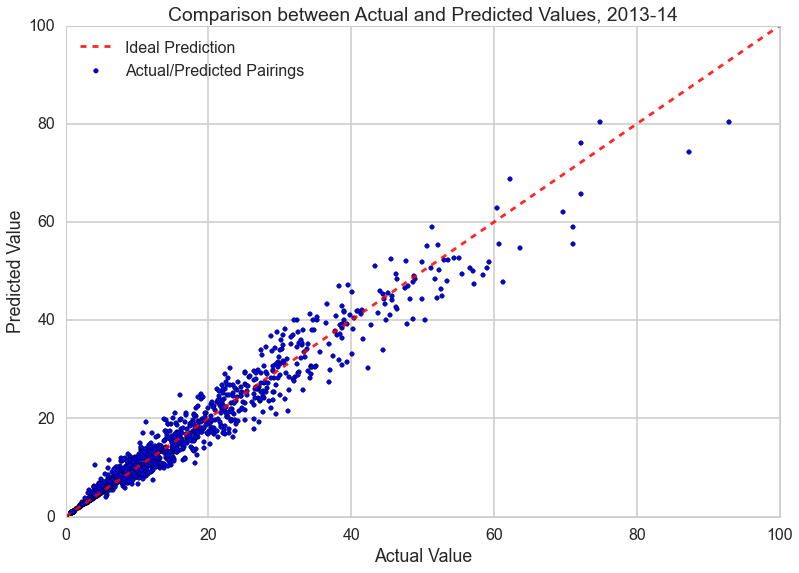

In [34]:
# Plot scatter of predictions vs. actual, 12-13 to 13-14
pred_target13 = forest2.predict(featDF13)
plt.figure()
plt.plot(range(101),range(101),'r--',alpha=0.85,label="Ideal Prediction")
plt.scatter(target13,pred_target13,label="Actual/Predicted Pairings")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison between Actual and Predicted Values, 2013-14")
plt.legend(loc=0)
plt.savefig('../Plots/actual-vs-predicted-2013-14.jpg',bbox_inches='tight')
plt.show()

#### Predicting top 20 players, by value, in 2013-2014 season, based on trained random forest from 2012-2013 season

In [35]:
testNames_rf13 = featDF13.index.values
pred_idx_rf13 = np.argsort(pred_target13)[-20:][::-1]
act_idx_rf13 = np.argsort(target13)[-20:][::-1]

In [36]:
top20_pred_rf13 = zip(testNames_rf13[pred_idx_rf13],pred_target13[pred_idx_rf13])
top20_actual_rf13 = zip(testNames_rf13[act_idx_rf13],target13[act_idx_rf13])

In [37]:
# Not sure how to plot this...
[(top20_actual_rf13[i][0], top20_pred_rf13[i][0]) for i in range(20)]

[(u'Cristiano Ronaldo', u'Cristiano Ronaldo'),
 (u'Lionel Messi', u'Luis Su\xc3\xa1rez'),
 (u'Luis Su\xc3\xa1rez', u'Zlatan Ibrahimovi\xc4\x87'),
 (u'Zlatan Ibrahimovi\xc4\x87', u'Lionel Messi'),
 (u'Ciro Immobile', u'Diego Costa'),
 (u'Carlos Vela', u'Ciro Immobile'),
 (u'Marco Reus', u'Daniel Sturridge'),
 (u'Alexis S\xc3\xa1nchez', u'Alexis S\xc3\xa1nchez'),
 (u'Steven Gerrard', u'Yaya Tour\xc3\xa9'),
 (u'Diego Costa', u'Carlos Vela'),
 (u'Andr\xc3\xa9-Pierre Gignac', u'Salomon Kalou'),
 (u'Salomon Kalou', u'Marco Reus'),
 (u'Daniel Sturridge', u'Luca Toni'),
 (u'Gonzalo Higua\xc3\xad\xc2\xadn', u'Olivier Giroud'),
 (u'Romelu Lukaku', u'Steven Gerrard'),
 (u'Mario Balotelli', u'Adri\xc3\xa1n Ramos'),
 (u'Ivan Rakiti\xc4\x87', u'Rodrigo Palacio'),
 (u'Wayne Rooney', u'Robert Lewandowski'),
 (u'Alessio Cerci', u'Domenico Berardi'),
 (u'Antonio Candreva', u'Carlos T\xc3\xa9vez')]

### We do see similar behavoir as before, where we have looser accuracy when predicting the value of outlying players. Let's investigate whether an ordinary linear regression can more accurately deal with these outliers.

In [38]:
# We'll use the same split on the 2012-13 season.
linReg = LinearRegression(fit_intercept=True,normalize=True).fit(Xtrain12_1,Ytrain12_1)

In [39]:
print "The accuracy of the Linear Regressor on the training set is: ", linReg.score(Xtrain12_1, Ytrain12_1)
print "The accuracy of the Linear Regressor on the test set is: ", linReg.score(Xtest12_1, Ytest12_1)

The accuracy of the Linear Regressor on the training set is:  0.996467821949
The accuracy of the Linear Regressor on the test set is:  0.994041026119


### BAM! Look at that accuracy... We shouldn't be so excited about this, but it's nice to see your intuition validated.

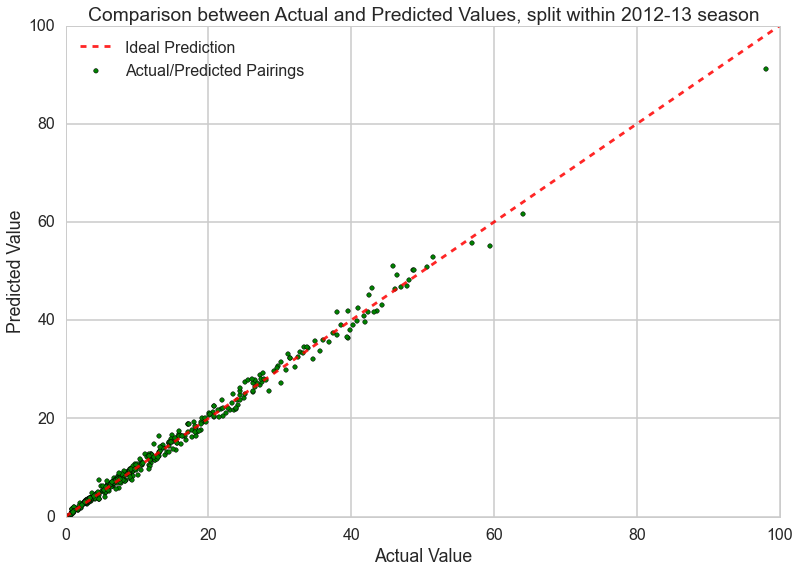

In [42]:
# Plot scatter of predictions vs. actual, linear regression within 2012-13 season
Ypred12_2 = linReg.predict(Xtest12_1)
plt.figure()
plt.plot(range(101),range(101),'r--',alpha=0.85,label="Ideal Prediction")
plt.scatter(Ytest12_1,Ypred12_2, c='g',label="Actual/Predicted Pairings")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison between Actual and Predicted Values, split within 2012-13 season")
plt.legend(loc=0)
plt.savefig('../Plots/rf-actual-vs-predicted-2012-13.jpg',bbox_inches='tight')
plt.show()

#### Predicting top 20 players from our 2012-13 test set using the linear regression

In [43]:
testNames_lin12 = Xtest12_1.index.values
pred_idx_lin12 = np.argsort(Ypred12_2)[-20:][::-1]
act_idx_lin12 = np.argsort(Ytest12_1)[-20:][::-1]

In [44]:
top20_pred_lin12 = zip(testNames_lin12[pred_idx_lin12],Ypred12_1[pred_idx_lin12])
top20_actual_lin12 = zip(testNames_lin12[act_idx_lin12],Ytest12_1[act_idx_lin12])

In [45]:
# Not sure how to plot this...
[(top20_actual_lin12[i][0], top20_pred_lin12[i][0]) for i in range(20)]

[(u'Robin van Persie', u'Robin van Persie'),
 (u'Gareth Bale', u'Gareth Bale'),
 (u'Edin D\xc5\xbeeko', u'Germ\xc3\xa1n Denis'),
 (u'Germ\xc3\xa1n Denis', u'Edin D\xc5\xbeeko'),
 (u'Aduriz', u'Aduriz'),
 (u'Dimitar Berbatov', u'Adam Le Fondre'),
 (u'Kevin De Bruyne', u'Dimitar Berbatov'),
 (u'Karim Benzema', u'Karim Benzema'),
 (u'Max Kruse', u'Kevin De Bruyne'),
 (u'Eden Hazard', u'Stephan El Shaarawy'),
 (u'Vedad Ibi\xc5\xa1evi\xc4\x87', u'Max Kruse'),
 (u'Stephan El Shaarawy', u'Eden Hazard'),
 (u'Dimitri Payet', u'Vedad Ibi\xc5\xa1evi\xc4\x87'),
 (u'Adam Le Fondre', u'Giampaolo Pazzini'),
 (u'Pablo Osvaldo', u'Dimitri Payet'),
 (u'Mevl\xc3\xbct Erdin\xc3\xa7', u'Demba Ba'),
 (u'Tomer Hemed', u'Pablo Osvaldo'),
 (u'Giampaolo Pazzini', u'Marouane Fellaini'),
 (u'Demba Ba', u'Mevl\xc3\xbct Erdin\xc3\xa7'),
 (u'\xc3\x81d\xc3\xa1m Szalai', u'Fabrizio Miccoli')]

### It's easy to see how much better our predictions are when compared with those of the random forest. This is likely due to our model being linear. It is clear that the regression is accurately learning our weights. We do slightly under-predict the top valued player in the test set, but not nearly as poorly as before. We'll continue by predicting the value of players from the 2013-14 season. 

In [46]:
linReg2 = LinearRegression(fit_intercept=True,normalize=True).fit(featDF12,target12)

In [47]:
print "The accuracy of the Linear Regressor on the 2012-13 (training) season is: ", linReg2.score(featDF12, target12)
print "The accuracy of the Linear Regressor on the 2013-14 (test) season is: ", linReg2.score(featDF13, target13)

The accuracy of the Linear Regressor on the 2012-13 (training) season is:  0.99585827287
The accuracy of the Linear Regressor on the 2013-14 (test) season is:  0.994880102566


### The accuracy from this regressor isn't as good as before which is likely due to the larger volume of data and higher variance in each feature. But we're just nitpicking here... Let's look to see if we captured the outliers even better than before.

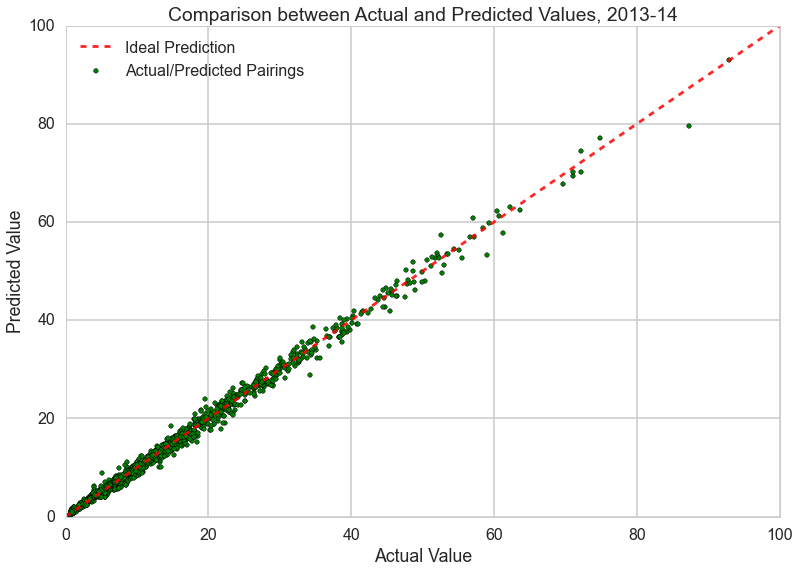

In [49]:
# Plot scatter of predictions vs. actual, linear regression 12-13 to 13-14
pred_target13_2 = linReg2.predict(featDF13)
plt.figure()
plt.plot(range(101),range(101),'r--',alpha=0.85,label="Ideal Prediction")
plt.scatter(target13,pred_target13_2, c='g',label="Actual/Predicted Pairings")
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Comparison between Actual and Predicted Values, 2013-14")
plt.legend(loc=0)
plt.savefig('../Plots/rf-actual-vs-predicted-2013-14.jpg',bbox_inches='tight')
plt.show()

#### Predicting top 20 players, by value, in 2013-2014 season, based on trained linear regression from 2012-2013 season

In [40]:
testNames_lin13 = featDF13.index.values
pred_idx_lin13 = np.argsort(pred_target13_2)[-20:][::-1]
act_idx_lin13 = np.argsort(target13)[-20:][::-1]

In [41]:
top20_pred_lin13 = zip(testNames_lin13[pred_idx_lin13],pred_target13_2[pred_idx_lin13])
top20_actual_lin13 = zip(testNames_lin13[act_idx_lin13],target13[act_idx_lin13])

In [42]:
# Not sure how to plot this...
[(top20_actual_lin13[i][0], top20_pred_lin13[i][0]) for i in range(20)]

[(u'Cristiano Ronaldo', u'Cristiano Ronaldo'),
 (u'Lionel Messi', u'Lionel Messi'),
 (u'Luis Su\xc3\xa1rez', u'Luis Su\xc3\xa1rez'),
 (u'Zlatan Ibrahimovi\xc4\x87', u'Zlatan Ibrahimovi\xc4\x87'),
 (u'Ciro Immobile', u'Ciro Immobile'),
 (u'Carlos Vela', u'Marco Reus'),
 (u'Marco Reus', u'Carlos Vela'),
 (u'Alexis S\xc3\xa1nchez', u'Alexis S\xc3\xa1nchez'),
 (u'Steven Gerrard', u'Diego Costa'),
 (u'Diego Costa', u'Steven Gerrard'),
 (u'Andr\xc3\xa9-Pierre Gignac', u'Daniel Sturridge'),
 (u'Salomon Kalou', u'Salomon Kalou'),
 (u'Daniel Sturridge', u'Wayne Rooney'),
 (u'Gonzalo Higua\xc3\xad\xc2\xadn', u'Gonzalo Higua\xc3\xad\xc2\xadn'),
 (u'Romelu Lukaku', u'Mario Balotelli'),
 (u'Mario Balotelli', u'Andr\xc3\xa9-Pierre Gignac'),
 (u'Ivan Rakiti\xc4\x87', u'Vincent Aboubakar'),
 (u'Wayne Rooney', u'Ivan Rakiti\xc4\x87'),
 (u'Alessio Cerci', u'Alessio Cerci'),
 (u'Antonio Candreva', u'Rodrigo Palacio')]